In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from alerce.core import Alerce
import sqlalchemy as sa

In [2]:
alerce_client = Alerce()

In [3]:
import requests
credentials_file = 'https://raw.githubusercontent.com/alercebroker/usecases/master/alercereaduser_v4.json'
params = requests.get(credentials_file).json()['params']
engine = sa.create_engine("postgresql+psycopg2://" + params["user"] \
                          + ":" + params["password"] + "@" + params["host"] \
                          + "/" + params["dbname"])
conn = engine.connect()

In [ ]:
query = """
SELECT
    *
FROM
    probability
WHERE
    classifier_name = 'lc_classifier'
    AND class_name = 'SNIa'
    AND probability >= 0.5
    LIMIT 20
"""
prob_dt = pd.read_sql_query(query, conn)
prob_dt.head()


,oid,classifier_name,classifier_version,class_name,probability,ranking
0,ZTF22aavwyfw,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.552000,1
1,ZTF22aaejjtb,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.507904,1
2,ZTF22abmynyd,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.548000,1
3,ZTF21abzcplo,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.508000,1
4,ZTF22aawibke,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.606000,1


In [5]:
prob_dt = prob_dt.sort_values(by='probability', ascending=False)
prob_dt.head()

,oid,classifier_name,classifier_version,class_name,probability,ranking
28,ZTF21abflmkk,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.686,1
57,ZTF21abrhggj,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.682,1
47,ZTF21abvfacx,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.646,1
55,ZTF21abkavmp,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.644,1
87,ZTF22aayrxbb,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.644,1


In [6]:
ligtcurves = alerce_client.query_detections(oid=prob_dt['oid'][0], format='pandas')
ligtcurves.head()

,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,...,rbversion,drb,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,step_id_corr,phase
0,ztf,59785.189062,2031189062315015004,2,2031189062315,20.707140,1,2031,5.101835,19.851152,...,t17_f5_c3,0.999999,20.1089,0.3125,480120223,True,False,False,dev,0.0
1,ztf,59785.212963,2031212962315015012,1,2031212962315,20.613132,1,2031,3.848102,19.986353,...,t17_f5_c3,0.998475,19.8732,0.2533,480120123,True,False,False,dev,0.0
2,ztf,59787.193056,2033193052315015007,2,2033193052315,20.462082,1,2033,5.020858,18.758924,...,t17_f5_c3,1.000000,18.6816,0.1069,480120223,True,False,False,dev,0.0
3,ztf,59789.212639,2035212632315015007,2,2035212632315,20.445677,1,2035,5.073372,18.027918,...,t17_f5_c3,1.000000,18.0393,0.0608,480120223,True,False,False,dev,0.0
4,ztf,59792.269282,2038269282315015007,1,2038269282315,19.052960,1,2038,3.936488,17.268000,...,t17_f5_c3,1.000000,17.1506,0.0748,480120123,True,False,False,dev,0.0


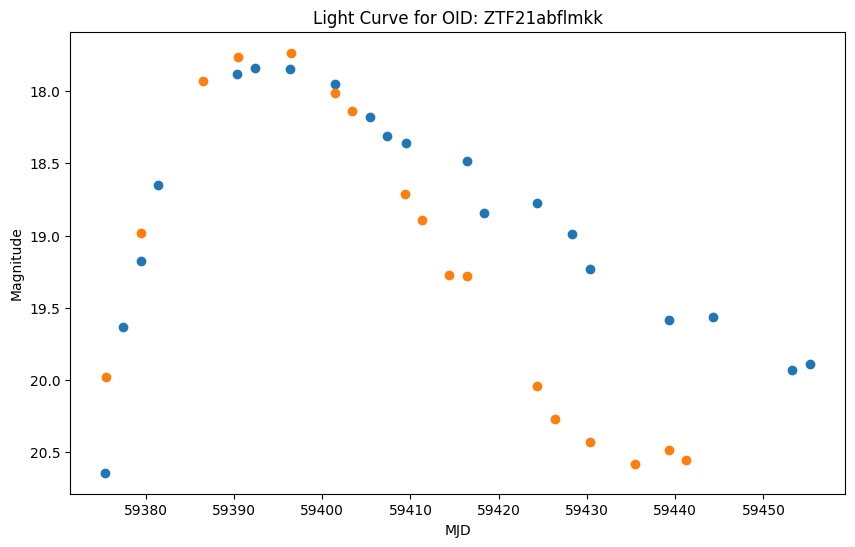

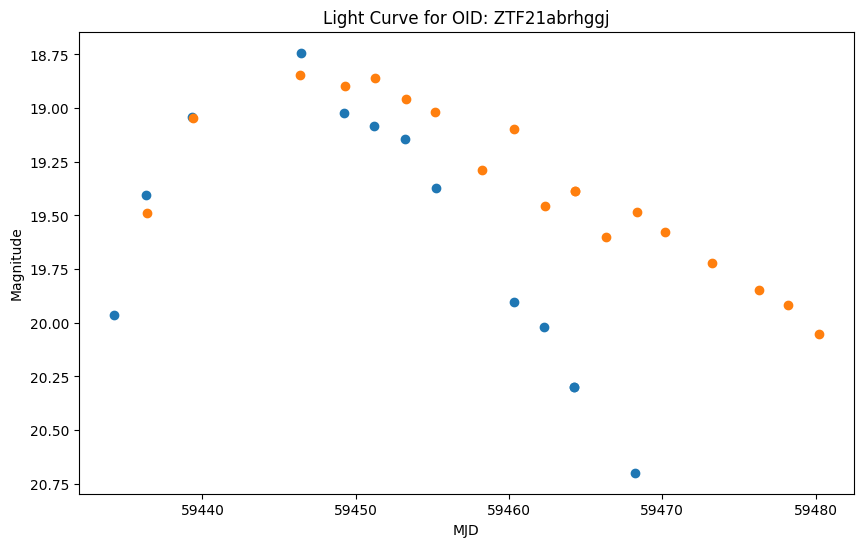

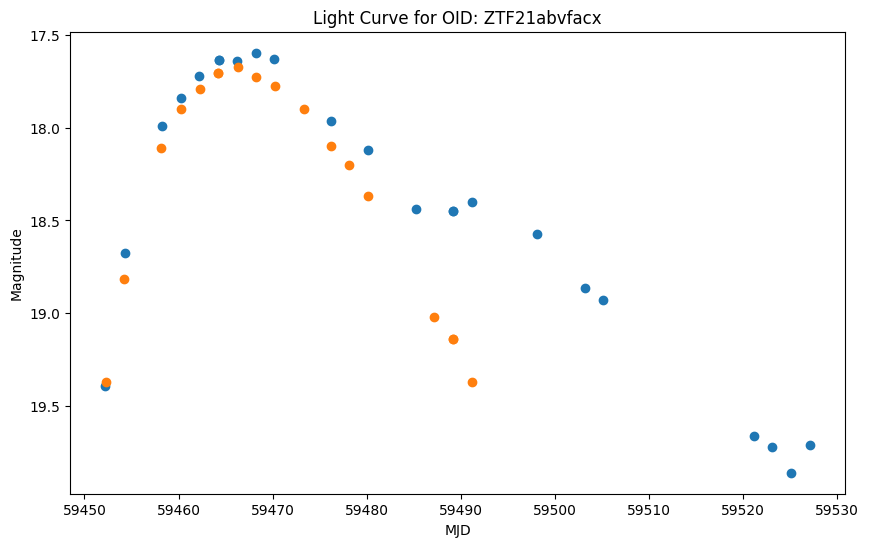

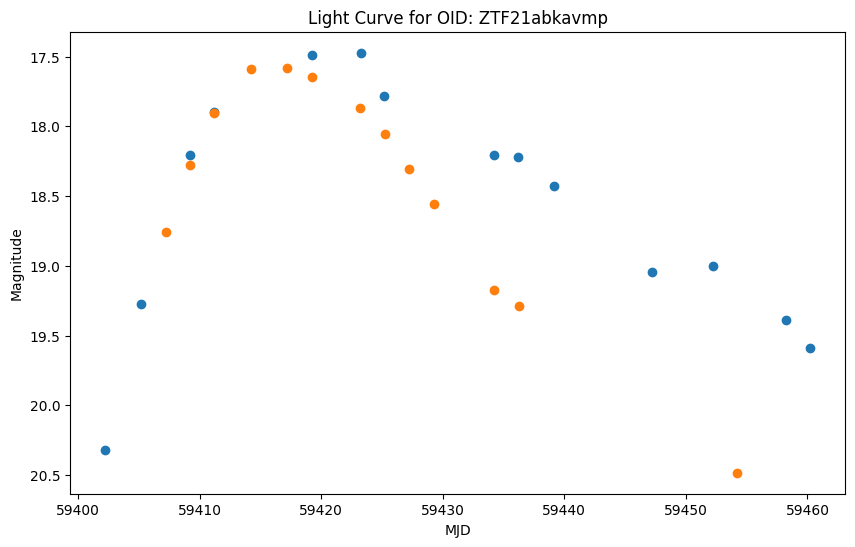

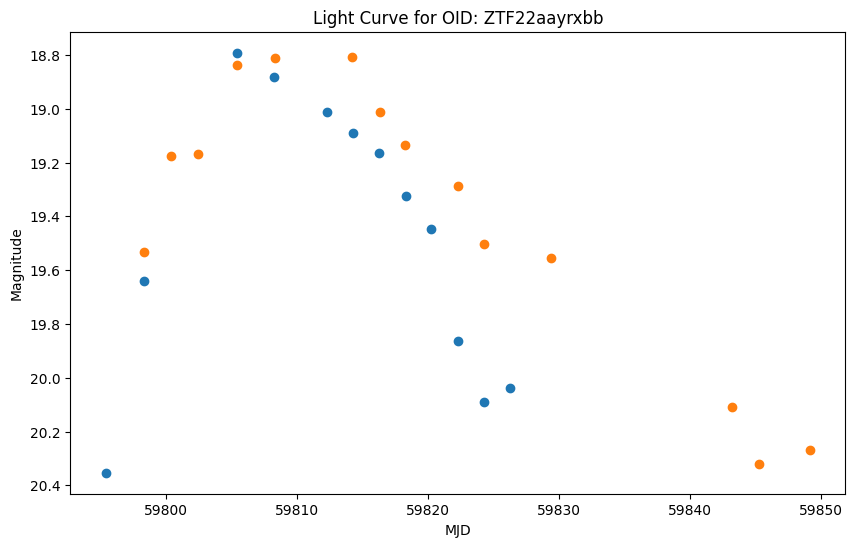

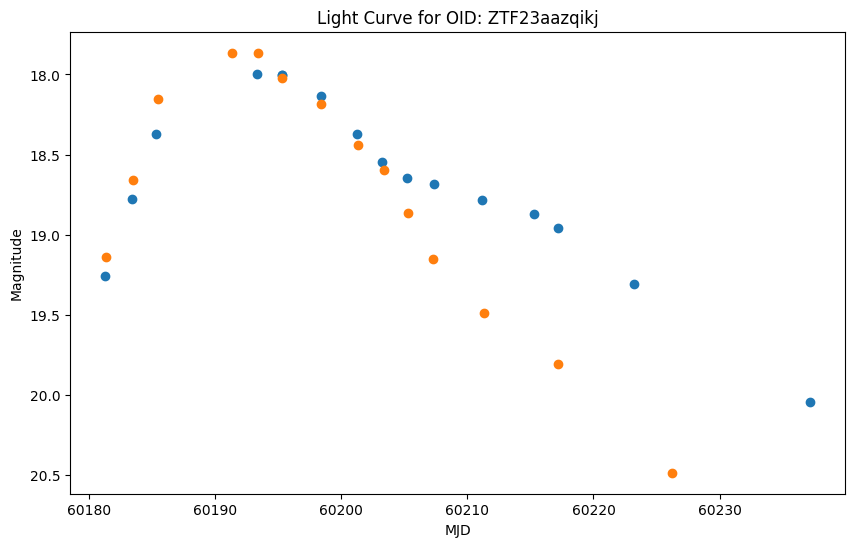

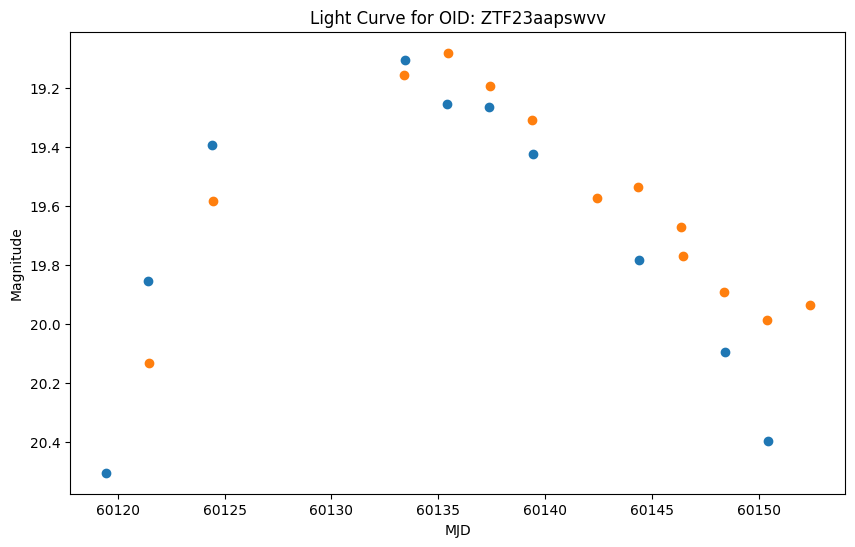

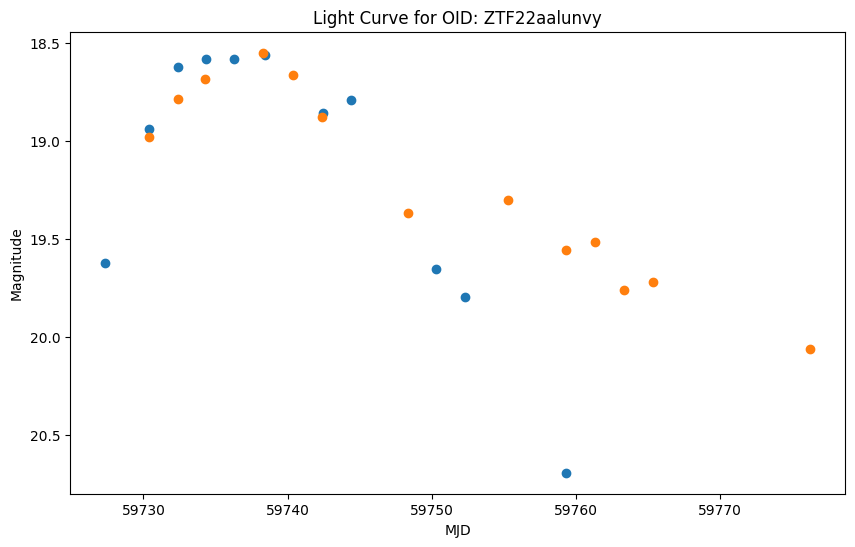

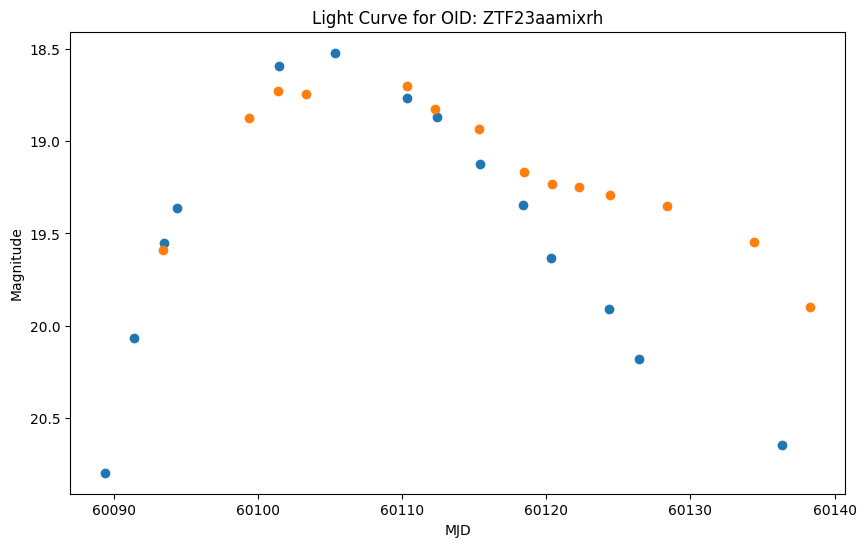

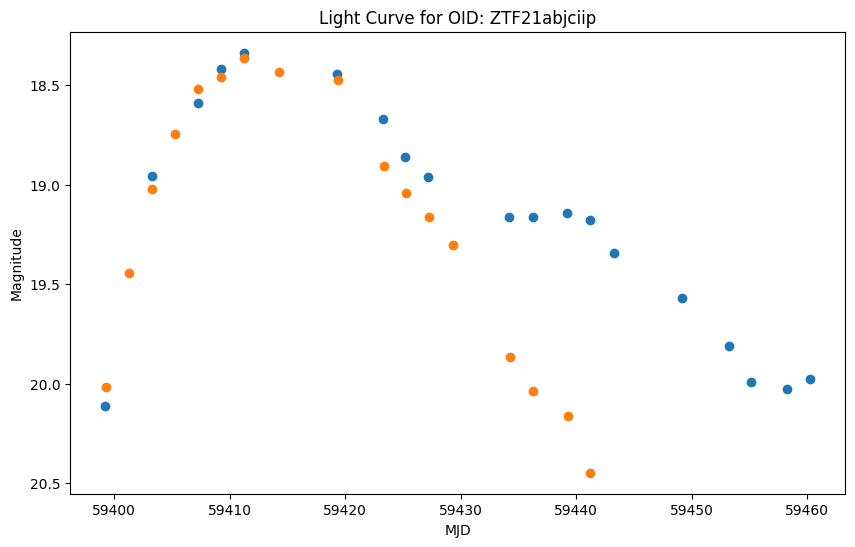

In [8]:
for oid in prob_dt['oid'].head(10):
    ligtcurves = alerce_client.query_detections(oid=oid, format='pandas')

    fig, ax = plt.subplots(figsize=(10, 6))
    for band in ligtcurves['fid'].unique():
        band_data = ligtcurves[ligtcurves['fid'] == band]
        ax.plot(band_data['mjd'], band_data['magpsf'], 'o', label=band)
    ax.invert_yaxis()
    ax.set_xlabel('MJD')
    ax.set_ylabel('Magnitude')
    ax.set_title(f'Light Curve for OID: {oid}')

/tmp/ipykernel_79245/1479833345.py:2: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(test_lightcurves['mjd'], test_lightcurves['magpsf'], deg=10)


Text(0.5, 1.0, 'Light Curve with Polynomial Fit for OID: ZTF21abjciip')

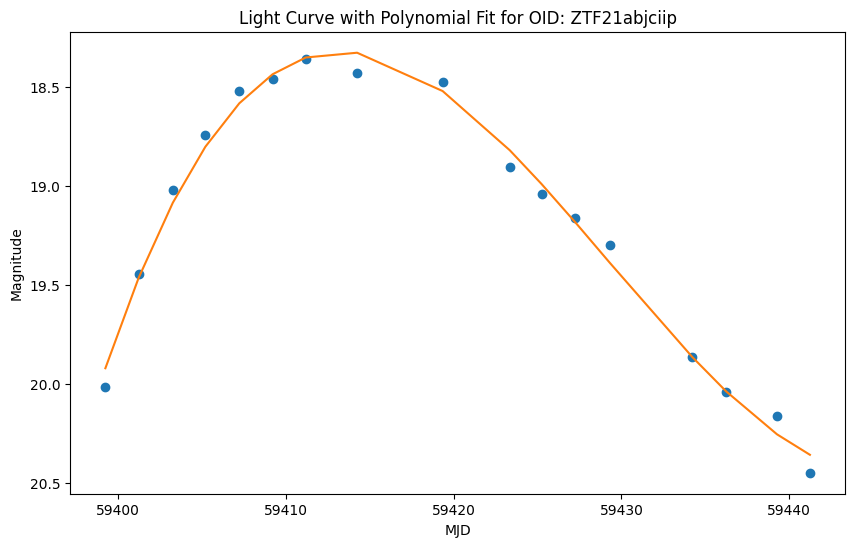

In [ ]:
test_lightcurves = ligtcurves[ligtcurves['fid'] == 1]
coeffs = np.polyfit(test_lightcurves['mjd'], test_lightcurves['magpsf'], deg=10)
coeffs

y = np.polyval(coeffs, test_lightcurves['mjd'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(test_lightcurves['mjd'], test_lightcurves['magpsf'], 'o', label='Data')
ax.plot(test_lightcurves['mjd'], y, '-', label='4th Degree Polynomial Fit')
ax.invert_yaxis()
ax.set_xlabel('MJD')
ax.set_ylabel('Magnitude')
ax.set_title(f'Light Curve with Polynomial Fit for OID: {oid}')

np.

In [51]:
conn.close()

OperationalError: (psycopg2.OperationalError) SSL SYSCALL error: EOF detected

(Background on this error at: https://sqlalche.me/e/20/e3q8)